In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# mapping
map = {}

with open("char dataset/emnist-byclass-mapping.txt", "r") as f:
	for line in f.readlines():
		num1, num2 = line.split()
		map[int(num1)] = chr(int(num2))

print(map)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}


In [3]:
train_data = pd.read_csv("char dataset/emnist-byclass-train.csv", header=None)
test_data  = pd.read_csv("char dataset/emnist-byclass-test.csv", header=None)

In [4]:
x_train = train_data.iloc[:, 1:].values.astype("float32") / 255.0
y_train = train_data.iloc[:, 0].values.astype("int32")

x_test = test_data.iloc[:, 1:].values.astype("float32") / 255.0
y_test = test_data.iloc[:, 0].values.astype("int32")

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

I


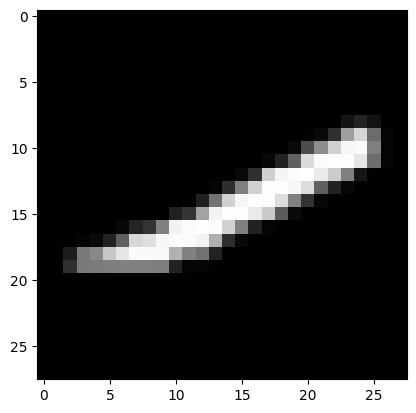

In [34]:
print(map[y_test[0]])
plt.imshow(x_test[0].reshape((28,28)), cmap="gray")
plt.show()

In [83]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
act = tf.keras.activations
opt = tf.keras.optimizers
los = tf.keras.losses

# 定義模型架構
model = Sequential()
model.add(Conv2D(32, (3, 3), activation=act.relu, input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=act.relu))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=act.relu))
model.add(Flatten())
model.add(Dense(64, activation=act.relu))
model.add(Dense(64, activation=act.relu))
model.add(Dense(62, activation=act.softmax)) # [0,62)

model.compile(optimizer=opt.RMSprop(), loss=los.sparse_categorical_crossentropy, metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
10906/10906 [==============================] - 357s 33ms/step - loss: 0.5286 - accuracy: 0.8222
Epoch 2/5
10906/10906 [==============================] - 358s 33ms/step - loss: 0.4041 - accuracy: 0.8560
Epoch 3/5
10906/10906 [==============================] - 463s 42ms/step - loss: 0.4026 - accuracy: 0.8579
Epoch 4/5
10906/10906 [==============================] - 383s 35ms/step - loss: 0.4108 - accuracy: 0.8561
Epoch 5/5
10906/10906 [==============================] - 382s 35ms/step - loss: 0.4229 - accuracy: 0.8535


In [85]:
test_loss, test_acc = model.evaluate(x_test, y_test)

3636/3636 [==============================] - 26s 7ms/step - loss: 0.4980 - accuracy: 0.8308


1/1 [==============================] - 0s 65ms/step
real: w | predict: w


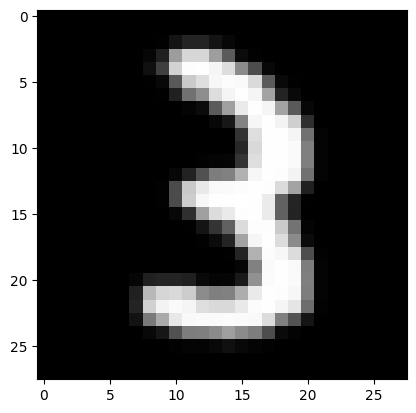

In [88]:
code = 6788

img = x_test[code]
print(f"real: {map[y_test[code]]} | predict: {map[np.argmax(model.predict(img.reshape(-1, 28, 28, 1)))]}")
plt.imshow(x_test[code].reshape((28,28)), cmap="gray")
plt.show()

In [84]:
model.save("char-cnn.model")

INFO:tensorflow:Assets written to: char-cnn.model\assets


INFO:tensorflow:Assets written to: char-cnn.model\assets


1/1 [==============================] - 0s 20ms/step
predict: q


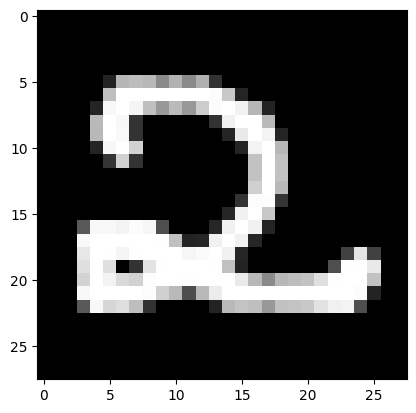

In [100]:
from PIL import Image

# 讀取圖像
image = np.array(Image.open("test/char.png").convert("L")).reshape(-1, 28, 28, 1) / 255.0

print(f"predict: {map[np.argmax(model.predict(image))]}")
plt.imshow(image.reshape((28,28)), cmap="gray")
plt.show()